# Recomendation System
**DATA DIRI:**

- nama lengkap: RAHMAT HIDAYAT

- ID Dicoding: mc013d5y1559

- email: imjustrahmat2722@gmail.com

# 1. Import Library

In [ ]:
!pip install scikit-surprise

In [ ]:
# Import library untuk manipulasi data
import pandas as pd
import numpy as np

# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk pemrosesan teks dan metrik(content base ffiltering)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Import library untuk collaborative filtering
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise.accuracy import mae
from surprise import Dataset
import warnings
warnings.filterwarnings('ignore')

Import library yang digunakan untuk data preparation, understanding, serta modeling dan evaluasi

# 3. Data Understanding

In [ ]:
# @title Data Loading
movies = pd.read_csv('https://drive.google.com/uc?id=1eql1qRJzay8ZPHUbL5iJozTnfxtfQ3Fg')
ratings = pd.read_csv('https://drive.google.com/uc?id=1-xwVnHvptp9zl2AYg0gpzpD6or7FTiZE')

In [ ]:
# @title menampilkan 5 baris awal data
print("Data Movies:")
print(movies.head())
print("\nData Ratings:")
print(ratings.head())

Data Movies:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Data Ratings:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [ ]:
# @title melihat informasi dasar dataset
print("Info Dataset Movies:")
print(movies.info())
print("\nInfo Dataset Ratings:")
print(ratings.info())

Info Dataset Movies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

Info Dataset Ratings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


Pertama untuk Data Understanding saya melihat informasi dasar dataset terlebih dahulu untuk mengenathui tipedata serta jumlah kolom dan baris setiap data.

In [ ]:
# @title cek missing value dan duplikat
print("Jumlah missing value pada dataset movies:")
print(movies.isnull().sum())
print("\nJumlah missing value pada dataset ratings:")
print(ratings.isnull().sum())

Jumlah missing value pada dataset movies:
movieId    0
title      0
genres     0
dtype: int64

Jumlah missing value pada dataset ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [ ]:
print("Jumlah duplikat pada dataset movies:")
print(movies.duplicated().sum())
print("\nJumlah duplikat pada dataset ratings:")
print(ratings.duplicated().sum())

Jumlah duplikat pada dataset movies:
0

Jumlah duplikat pada dataset ratings:
0


Tidak ada Missing Value dan duplikat pada Data, sehingga tidak diperlkan penanganan lebih lanjut

## 3.1 Exloration Data Analysis

In [ ]:
# @title Deskripsi Statistik
print("Deskripsi Statistik Dataset Movies:")
print(movies.describe())
print("\nDeskripsi Statistik Dataset Ratings:")
print(ratings.describe())

Deskripsi Statistik Dataset Movies:
             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000

Deskripsi Statistik Dataset Ratings:
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09


KESIMPULAN :

📁 Dataset: movies.csv
🔗 URL/Tautan Sumber Data

Dataset ini diunduh melalui tautan berikut:
https://drive.google.com/uc?id=1eql1qRJzay8ZPHUbL5iJozTnfxfQ3Fg
🔢 Jumlah Baris dan Kolom

    Jumlah data: 9.742 baris dan 3 kolom

🧹 Kondisi Data

    Missing value: Tidak ditemukan nilai kosong pada seluruh kolom.

    Duplikat: Tidak terdapat baris yang sama persis (duplikat).

    Outlier: Tidak relevan karena semua data bersifat kategorikal.

📌 Uraian Seluruh Fitur

    movieId: ID unik untuk setiap film.

    title: Judul film beserta tahun rilis, misalnya Toy Story (1995).

    genres: Kategori genre film yang dipisahkan dengan tanda pipe (|), misalnya Adventure|Animation|Children|Comedy|Fantasy.

📁 Dataset: ratings.csv
🔗 URL/Tautan Sumber Data

Dataset ini diunduh melalui tautan berikut:
https://drive.google.com/uc?id=1-xwVnHvpt9zl2AYg0gpzpD6or7FTiZE
🔢 Jumlah Baris dan Kolom

    Jumlah data: 100.836 baris dan 4 kolom

🧹 Kondisi Data

    Missing value: Tidak ditemukan nilai kosong.

    Duplikat: Tidak terdapat duplikasi baris.

    Outlier: Tidak ditemukan nilai rating di luar rentang normal (semua berada di antara 0.5 hingga 5.0).

📌 Uraian Seluruh Fitur

    userId: ID unik pengguna yang memberikan rating.

    movieId: ID film yang dirujuk, sesuai dengan movieId pada movies.csv.

    rating: Nilai penilaian yang diberikan oleh pengguna terhadap film, dalam skala 0.5 hingga 5.0.

    timestamp: Waktu pemberian rating dalam format Unix timestamp.

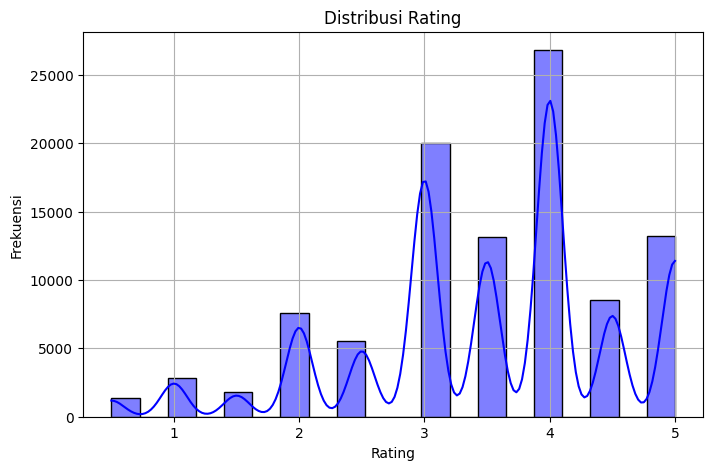

In [ ]:
# @title Distribusi Rating
plt.figure(figsize=(8, 5))
sns.histplot(ratings['rating'], bins=20, kde=True, color='blue')
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

## Insight Visualisasi Rating Film

* **Rating Terbanyak:** Sebagian besar pengguna memberikan rating di sekitar nilai 4, menunjukkan bahwa secara umum mayoritas film cukup memuaskan.
* **Distribusi:** Distribusi rating cenderung miring ke kanan (right-skewed), yang berarti ada lebih banyak rating tinggi dibandingkan rating rendah. Hal ini mengindikasikan bahwa mayoritas film memiliki kualitas yang cukup baik, namun masih ada potensi untuk ditingkatkan.
* **Rating Ekstrem:**
  * **Rating Rendah:** Hanya sedikit pengguna yang memberikan rating sangat rendah (mendekati 1), menunjukkan bahwa masalah serius pada mayoritas film mungkin jarang terjadi.
  * **Rating Tinggi:** Meskipun ada jumlah yang signifikan dari rating tinggi (mendekati 5), namun tidak sebanyak rating di sekitar nilai 4. Ini bisa menjadi indikator bahwa ada beberapa aspek mayoritas film yang masih perlu ditingkatkan untuk mencapai kepuasan pelanggan maksimal.
* **Kesimpulan:** Secara keseluruhan, hasil visualisasi menunjukkan bahwa mayoritas film memiliki kualitas yang baik dan cukup digemari oleh pengguna. Namun, terdapat peluang untuk meningkatkan kepuasan pelanggan dengan fokus pada aspek-aspek yang dapat mendorong lebih banyak pengguna memberikan rating 5.

                                          title  average_rating
7638      Paper Birds (Pájaros de papel) (2010)             5.0
8089                 Act of Killing, The (2012)             5.0
9065                            Jump In! (2007)             5.0
9076                               Human (2015)             5.0
9078                        L.A. Slasher (2015)             5.0
4245                           Lady Jane (1986)             5.0
8136             Bill Hicks: Revelations (1993)             5.0
8130               Justice League: Doom (2012)              5.0
4240  Open Hearts (Elsker dig for evigt) (2002)             5.0
9104                     Formula of Love (1984)             5.0


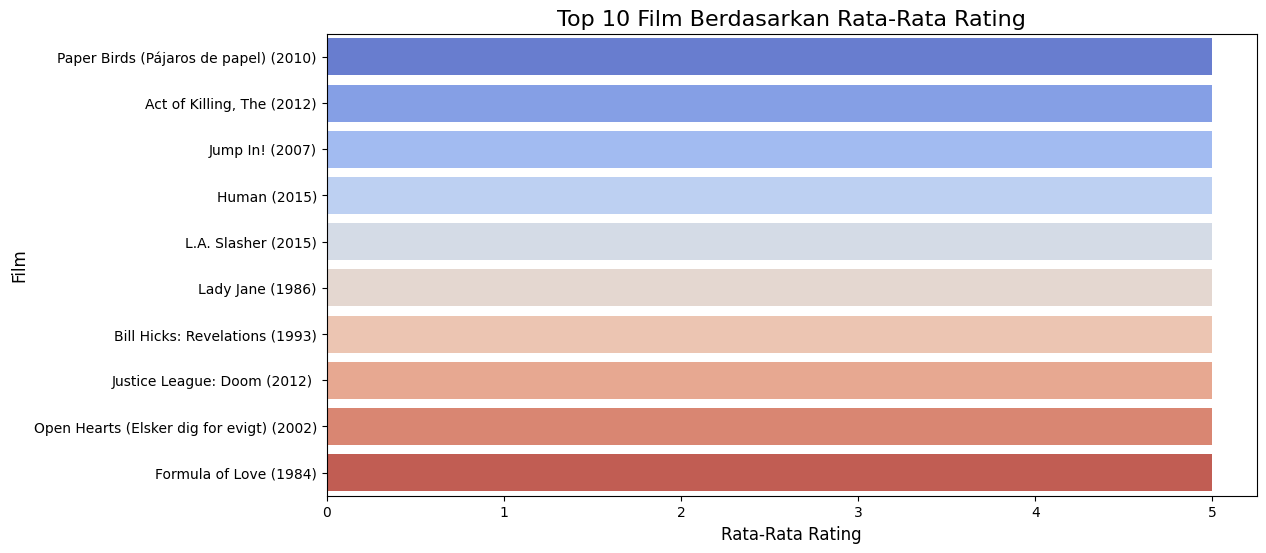

In [ ]:
# @title TOP 10 film dengan rating tertinggi
average_ratings = ratings.groupby('movieId')['rating'].mean().reset_index(name='average_rating')
average_ratings = average_ratings.merge(movies, on='movieId')
top_rated_movies_avg = average_ratings.sort_values(by='average_rating', ascending=False).head(10)
print(top_rated_movies_avg[['title', 'average_rating']])

# Visualisasi rata-rata rating
plt.figure(figsize=(12,6))
sns.barplot(x='average_rating', y='title', data=top_rated_movies_avg, palette='coolwarm')
plt.title('Top 10 Film Berdasarkan Rata-Rata Rating', fontsize=16)
plt.xlabel('Rata-Rata Rating', fontsize=12)
plt.ylabel('Film', fontsize=12)
plt.show()

Berdasarkan analisis terhadap film-film yang masuk dalam top 10, dapat diambil beberapa kesimpulan menarik:

* **Dominasi Film Tahun 2000-an:** Mayoritas film yang menempati posisi teratas dirilis pada dekade 2000-an. Hal ini mengindikasikan bahwa film-film yang diproduksi pada periode ini secara umum berhasil meraih rating tinggi dan mendapatkan apresiasi dari penonton.
* **Kepopuleran Film Klasik:** Beberapa film yang dirilis pada dekade 1970-an dan 1980-an masih mampu bersaing dan masuk dalam daftar top 10. Fakta ini menunjukkan bahwa film-film klasik tetap memiliki daya tarik tersendiri bagi penonton lintas generasi.
* **Minimnya Representasi Film Tahun 1990-an:** Menariknya, tidak ada satupun film yang dirilis pada dekade 1990-an yang masuk dalam top 10. Hal ini bisa mengindikasikan beberapa kemungkinan, seperti:
  * **Standar Penonton yang Lebih Tinggi:** Penonton pada dekade 2000-an mungkin memiliki standar yang lebih tinggi terhadap kualitas film, sehingga film-film tahun 1990-an dianggap kurang memenuhi ekspektasi.
  * **Kurangnya Pengujian Waktu:** Film-film yang dirilis pada dekade 1990-an mungkin belum memiliki waktu yang cukup untuk teruji oleh waktu dan mendapatkan apresiasi yang lebih luas.
  * **Faktor Lain:** Bisa jadi ada faktor lain yang mempengaruhi, seperti perubahan tren industri film atau keterbatasan data yang digunakan dalam analisis.

**Kesimpulan:**

Analisis ini menunjukkan bahwa preferensi penonton film terus berubah seiring waktu. Meskipun film-film klasik tetap dihargai, film-film yang dirilis pada dekade 2000-an secara umum lebih dominan dalam daftar top 10. Hal ini memberikan gambaran tentang tren industri film dan preferensi penonton pada periode tersebut.

                                       title  rating_count
0                        Forrest Gump (1994)           329
1           Shawshank Redemption, The (1994)           317
2                        Pulp Fiction (1994)           307
3           Silence of the Lambs, The (1991)           279
4                         Matrix, The (1999)           278
5  Star Wars: Episode IV - A New Hope (1977)           251
6                       Jurassic Park (1993)           238
7                          Braveheart (1995)           237
8          Terminator 2: Judgment Day (1991)           224
9                    Schindler's List (1993)           220


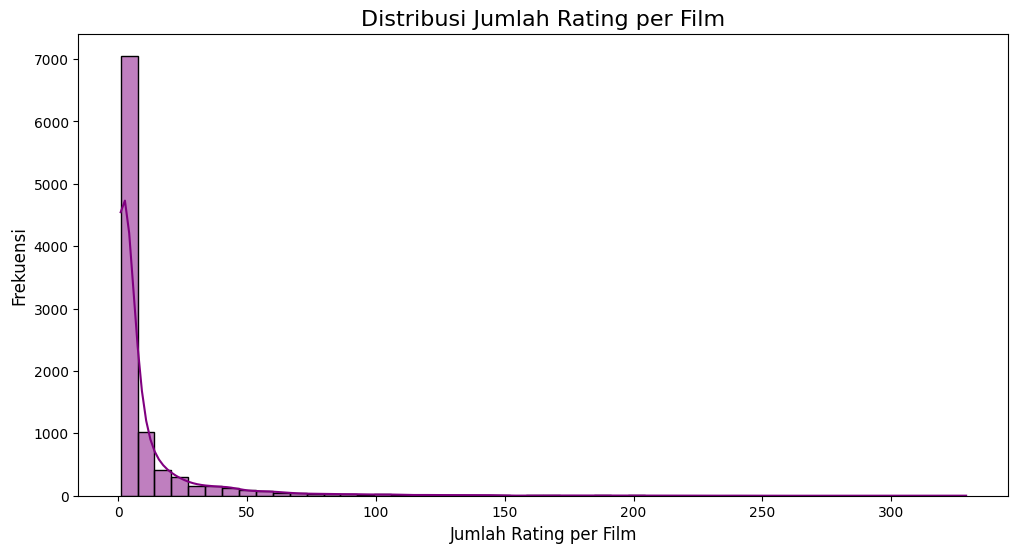

In [ ]:
# @title Julah Rating perfilm
# Menghitung jumlah rating per film
rating_counts = ratings.groupby('movieId').size().reset_index(name='rating_count')
top_rated_movies = rating_counts.sort_values(by='rating_count', ascending=False).head(10)
top_rated_movies = top_rated_movies.merge(movies, on='movieId')
print(top_rated_movies[['title', 'rating_count']])

# Visualisasi jumlah rating per film
plt.figure(figsize=(12,6))
sns.histplot(rating_counts['rating_count'], bins=50, kde=True, color='purple')
plt.title('Distribusi Jumlah Rating per Film', fontsize=16)
plt.xlabel('Jumlah Rating per Film', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

Berdasarkan analisis histogram distribusi jumlah rating film, dapat disimpulkan sebagai berikut:

* **Mayoritas Film Memiliki Rating Rendah:** Sebagian besar film dalam dataset ini hanya memiliki sedikit rating, dengan rentang 0-10 rating per film mendominasi distribusi . Hal ini menunjukkan bahwa sebagian besar film mungkin merupakan film independen, film niche, atau film yang kurang dikenal publik.
* **Ekor Panjang ke Kanan:** Histogram menunjukkan pola ekor panjang ke kanan, di mana semakin banyak rating yang diterima sebuah film, semakin sedikit jumlah film yang berada dalam kategori tersebut. Ini mengindikasikan adanya beberapa film yang sangat populer dan berhasil mengumpulkan banyak rating, namun jumlah film seperti ini relatif sedikit dibandingkan dengan film-film yang kurang populer.
* **Distribusi Eksponensial:** Distribusi jumlah rating secara keseluruhan mengikuti pola eksponensial. Artinya, frekuensi film dengan jumlah rating tinggi menurun secara drastis dibandingkan dengan film yang memiliki jumlah rating rendah. Hal ini merupakan pola yang umum ditemukan dalam distribusi banyak fenomena, termasuk popularitas film.


     userId  rating_count_user
413     414               2698
598     599               2478
473     474               2108
447     448               1864
273     274               1346
609     610               1302
67       68               1260
379     380               1218
605     606               1115
287     288               1055


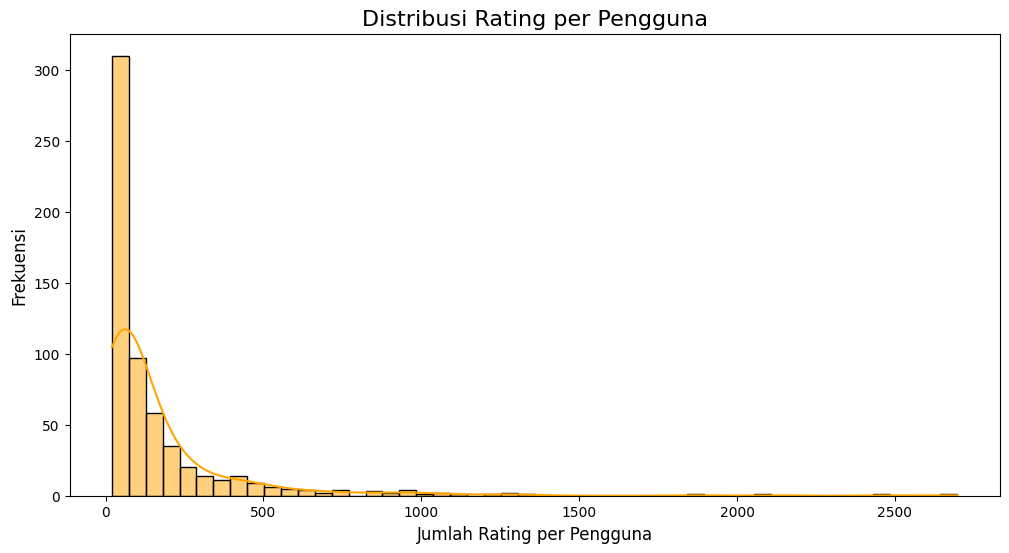

In [ ]:
# @title Distribusi rating user

user_rating_counts = ratings.groupby('userId').size().reset_index(name='rating_count_user')

# Menampilkan pengguna dengan rating terbanyak
top_users = user_rating_counts.sort_values(by='rating_count_user', ascending=False).head(10)
print(top_users)

# Visualisasi distribusi rating per pengguna
plt.figure(figsize=(12,6))
sns.histplot(user_rating_counts['rating_count_user'], bins=50, kde=True, color='orange')
plt.title('Distribusi Rating per Pengguna', fontsize=16)
plt.xlabel('Jumlah Rating per Pengguna', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

Berdasarkan visualisasi distribusi rating per pengguna, dapat diambil beberapa kesimpulan sebagai berikut:

### Karakteristik Distribusi
* **Asimetris:** Distribusi rating per pengguna menunjukkan bentuk yang asimetris, dengan ekor panjang ke kanan. Ini berarti sebagian besar pengguna memberikan rating dalam jumlah yang relatif sedikit, sementara hanya sedikit pengguna yang sangat aktif dalam memberikan rating.
* **Ekor Kanan:** Adanya ekor kanan pada distribusi mengindikasikan keberadaan sejumlah kecil pengguna yang memberikan kontribusi sangat signifikan terhadap total rating. Pengguna-pengguna ini dapat dianggap sebagai pengguna super aktif.

### Implikasi
* **Aktivitas Pengguna:**
  * **Mayoritas Pengguna Pasif:** Sebagian besar pengguna hanya memberikan sedikit rating, menunjukkan tingkat aktivitas yang rendah dalam platform. Hal ini bisa disebabkan oleh berbagai faktor, seperti kurangnya minat, kesulitan dalam memberikan rating, atau kurangnya pemahaman tentang manfaat memberikan rating.
  * **Pengguna Super Aktif:** Sebaliknya, terdapat segmen kecil pengguna yang sangat aktif dalam memberikan rating. Pengguna ini memiliki peran penting dalam membentuk distribusi keseluruhan dan seringkali memberikan umpan balik yang berharga bagi platform.


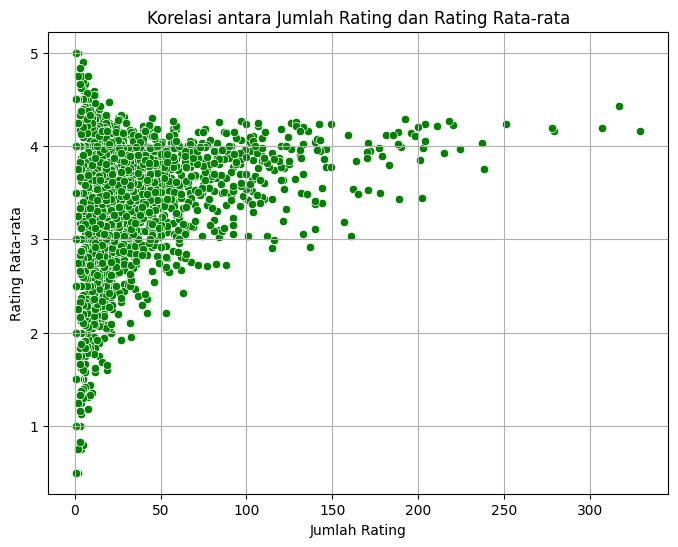

In [ ]:
# @title Korelasi Rating dengan Jumlah Rating
rating_data = ratings.groupby('movieId').agg({'rating': 'mean', 'userId': 'count'}).rename(columns={'userId': 'num_ratings'})
plt.figure(figsize=(8, 6))
sns.scatterplot(x='num_ratings', y='rating', data=rating_data, color='green')
plt.title('Korelasi antara Jumlah Rating dan Rating Rata-rata')
plt.xlabel('Jumlah Rating')
plt.ylabel('Rating Rata-rata')
plt.grid(True)
plt.show()

## Analisis Korelasi: Jumlah Rating vs. Rating Rata-rata

**Visualisasi** menunjukkan adanya **korelasi positif yang lemah** antara jumlah rating yang diterima oleh suatu produk atau layanan dengan rating rata-rata yang diperolehnya.

### Temuan Utama:
* **Tren Umum:** Terdapat kecenderungan umum bahwa semakin banyak rating yang diterima oleh suatu produk atau layanan, maka cenderung memiliki rating rata-rata yang lebih tinggi. Ini mengindikasikan bahwa jumlah rating dapat menjadi salah satu faktor yang mempengaruhi persepsi kualitas produk atau layanan di mata user.
* **Sebaran Data:** Sebagian besar data terkonsentrasi pada area dengan jumlah rating yang rendah, menunjukkan bahwa banyak produk atau layanan yang belum mendapatkan banyak ulasan dari user.
* **Pengecualian:** Terdapat beberapa titik data yang tidak mengikuti tren umum, di mana produk atau layanan dengan jumlah rating tinggi justru memiliki rating rata-rata yang rendah, atau sebaliknya. Ini mengindikasikan bahwa jumlah rating bukanlah satu-satunya faktor yang menentukan rating rata-rata. Faktor lain seperti kualitas produk itu sendiri, bias dalam memberikan rating, atau timing pemberian rating juga dapat mempengaruhi.

# 4. Data Preparation

In [ ]:
# @title 4.1 Data Preparation untuk Collaborative Filtering
# Format data untuk Surprise library
reader = Reader(rating_scale=(0.5, 5.0))  # Skala rating dari dataset
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Bagi data menjadi training dan testing
trainset, testset = train_test_split(data, test_size=0.2)

Tahap **persiapan data** untuk model **Collaborative Filtering** menggunakan **Surprise library**, yang dirancang untuk memprediksi rating berdasarkan pola preferensi pengguna. Berikut penjelasannya:

1. **Format Data**  
   - `Reader`: Mengatur skala rating (0.5 hingga 5.0) sesuai dengan dataset, agar Surprise dapat memahami struktur data.
   - `Dataset.load_from_df`: Mengonversi data rating dari DataFrame (`ratings`) menjadi format internal Surprise yang dibutuhkan untuk model rekomendasi.

2. **Pembagian Data**  
   - `train_test_split`: Memisahkan data menjadi **training set** (80%) dan **testing set** (20%).  
   - **Alasan**:
     - Training set digunakan untuk melatih model.
     - Testing set digunakan untuk mengevaluasi performa model dengan data yang belum pernah dilihat.  
   Metode ini membantu mengukur generalisasi model dan menghindari overfitting.

In [ ]:
# @title Data Preparation untuk content base filtering
# Pastikan data 'genres' diolah menjadi string bersih
movies['genres'] = movies['genres'].str.replace('|', ' ')
print("\nData Movies setelah memproses kolom genres:")
print(movies.head())


Data Movies setelah memproses kolom genres:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure Animation Children Comedy Fantasy  
1                   Adventure Children Fantasy  
2                               Comedy Romance  
3                         Comedy Drama Romance  
4                                       Comedy  


In [ ]:
# Vektorisasi genre menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(movies['genres'])
print("\nHasil vektorisasi genre (matriks TF-IDF):")
print(tfidf_matrix.toarray())  # Menampilkan matriks TF-IDF sebagai array


Hasil vektorisasi genre (matriks TF-IDF):
[[0.         0.41684567 0.51622547 ... 0.         0.         0.        ]
 [0.         0.51236121 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.57860574 0.         0.81560738 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


### **Penjelasan Tahapan Data Preparation**

1. **Pembersihan Kolom `genres`**  
   - Pada tahap ini, data dalam kolom `genres` yang semula menggunakan simbol `|` sebagai pemisah diubah menjadi spasi dengan perintah:  
     ```python
     movies['genres'] = movies['genres'].str.replace('|', ' ')
     ```
   - Tujuan utama langkah ini adalah untuk membuat representasi teks yang lebih bersih dan mudah dipahami, baik untuk proses selanjutnya seperti analisis maupun oleh model rekomendasi itu sendiri.
   - Hasil transformasi ini juga memungkinkan sistem untuk mengenali genre sebagai satuan teks yang terpisah (contoh: "Action Adventure Comedy" alih-alih "Action|Adventure|Comedy").

2. **Visualisasi Data Setelah Praproses**  
   - Data ditampilkan dengan tujuannya adalah untuk memverifikasi apakah data sudah diolah sesuai harapan. Hal ini penting untuk memastikan integritas data sebelum melangkah ke tahapan selanjutnya.

3. **Representasi Data dengan Vektorisasi**  
   - **Vektorisasi**: Data teks dari kolom `genres` diubah menjadi representasi numerik melalui teknik **TF-IDF (Term Frequency-Inverse Document Frequency)**
   - Hasil vektorisasi berupa matriks yang menunjukkan bobot numerik dari setiap genre pada setiap film. Matriks ini berfungsi sebagai input bagi model rekomendasi untuk menghitung kesamaan antar item.

4. **Menampilkan Matriks TF-IDF**  
   - Matriks TF-IDF divisualisasikan dalam bentuk array
   - Hal ini memungkinkan pengguna memahami struktur data setelah representasi numerik.  

### **Kesimpulan**  
Proses **Data Preparation** ini merupakan tahap awal yang krusial dalam membangun sistem **Content-Based Filtering**. Langkah-langkahnya meliputi pembersihan data, transformasi teks menjadi representasi numerik, dan verifikasi hasil transformasi. Output dari tahapan ini akan digunakan dalam tahap berikutnya, seperti penghitungan kemiripan antar item untuk menghasilkan rekomendasi.

# 5. Modeling

## 5.1 Collaborative Filtering dengan Surprise

In [ ]:
# @title menggunakan SVD dari library surprise
model = SVD()

# Latih model dengan data training
model.fit(trainset)

# Evaluasi model pada data testing
predictions = model.test(testset)
print("\nHasil Evaluasi Model:")
mae_score = mae(predictions)
print(f"MAE: {mae_score:.4f}")

# 4. Fungsi Rekomendasi untuk Pengguna
def recommend_for_user(user_id, n=5):
    # Ambil semua movieId yang belum dirating oleh user
    rated_movies = ratings[ratings['userId'] == user_id]['movieId'].tolist()
    all_movies = ratings['movieId'].unique()
    unrated_movies = [movie for movie in all_movies if movie not in rated_movies]

    # Prediksi rating untuk film yang belum dirating
    predicted_ratings = [(movie, model.predict(user_id, movie).est) for movie in unrated_movies]

    # Urutkan film berdasarkan prediksi rating
    top_recommendations = sorted(predicted_ratings, key=lambda x: x[1], reverse=True)[:n]

    # Ambil judul film
    movie_titles = {row['movieId']: row['title'] for _, row in pd.read_csv('https://drive.google.com/uc?id=1eql1qRJzay8ZPHUbL5iJozTnfxtfQ3Fg').iterrows()}
    recommendations = [(movie_titles[movie], rating) for movie, rating in top_recommendations if movie in movie_titles]

    return recommendations


Hasil Evaluasi Model:
MAE:  0.6668
MAE: 0.6668


Untuk Collaborative filtering saya menggunakan SVD dari library surprise, saya memilih SVD dikarenakan kemampuan SVD
yang mampu mereduksi kompleksitas matriks besar menjadi komponen lebih kecil yang relevan.

Untuk Parameternnya saya menggunakan parameter default pada SVD

Berikut ini adalah metode colaborative filtering menggunakan SVD

In [ ]:
# Contoh rekomendasi untuk userId tertentu
user_id = 2
recommendations = recommend_for_user(user_id, n=5)
print(f"\nRekomendasi untuk User {user_id}:")
for i, (title, rating) in enumerate(recommendations):
    print(f"{i+1}. {title} (Predicted Rating: {rating:.2f})")


Rekomendasi untuk User 2:
1. Usual Suspects, The (1995) (Predicted Rating: 4.50)
2. Godfather: Part II, The (1974) (Predicted Rating: 4.48)
3. Lost in Translation (2003) (Predicted Rating: 4.46)
4. Star Wars: Episode IV - A New Hope (1977) (Predicted Rating: 4.39)
5. Schindler's List (1993) (Predicted Rating: 4.38)


Terlihat pada hasil rekomendasi untuk user 2, model dapat merekomendasikan dan memprediksi rating dari user

## 5.2 Content-Based Filtering

In [ ]:
# @title Content-Based Filtering

# Hitung cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print("\nHasil kemiripan kosinus:")
print(cosine_sim)  # Menampilkan matriks kemiripan kosinus

# Fungsi untuk rekomendasi berbasis konten
def content_based_recommendation(title, n=5):
    # Ambil indeks film berdasarkan judul
    idx = movies[movies['title'] == title].index[0]

    # Ambil skor kemiripan dengan film input
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil indeks film yang mirip
    sim_indices = [i[0] for i in sim_scores[1:n+1]]

    # Ambil judul film yang mirip
    return movies.iloc[sim_indices]['title'].tolist()


Hasil kemiripan kosinus:
[[1.         0.81357774 0.15276924 ... 0.         0.4210373  0.26758648]
 [0.81357774 1.         0.         ... 0.         0.         0.        ]
 [0.15276924 0.         1.         ... 0.         0.         0.57091541]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.4210373  0.         0.         ... 0.         1.         0.        ]
 [0.26758648 0.         0.57091541 ... 0.         0.         1.        ]]


**Content-Based Filtering** adalah pendekatan dalam sistem rekomendasi yang menggunakan informasi dari fitur atau atribut item (seperti genre film) untuk merekomendasikan item serupa kepada pengguna. Dalam hal ini, algoritma mencari **kemiripan antara item** berdasarkan atribut yang relevan, tanpa memerlukan interaksi langsung dari pengguna.

---

### **Mengapa Menggunakan Content-Based Filtering?**

1. **Berdasarkan Preferensi Individual**:
   - Sistem ini sangat cocok ketika ingin merekomendasikan item yang mirip dengan item yang sudah diketahui pengguna.

2. **Tidak Bergantung pada Data Pengguna Lain**:
   - Tidak memerlukan data dari pengguna lain seperti pada collaborative filtering. Berguna untuk menghindari cold-start problem bagi pengguna baru.

3. **Mudah Diinterpretasi**:
   - Rekomendasi dapat dijelaskan karena berbasis pada atribut (misalnya, "Film ini direkomendasikan karena memiliki genre serupa dengan film sebelumnya").

---

### **Langkah-Langkah Implementasi**

#### 1. **Praproses Data Genre**
   ```python
   movies['genres'] = movies['genres'].str.replace('|', ' ')
   ```
   - Mengubah genre film menjadi format string yang bersih untuk diproses. Genre dipisahkan oleh spasi agar mudah dipahami oleh algoritma.

#### 2. **Representasi Data**
   - Data genre direpresentasikan dalam format yang memungkinkan algoritma menghitung kesamaan antar film.

#### 3. **Menghitung Kemiripan Antar Item**
   ```python
   from sklearn.metrics.pairwise import cosine_similarity
   cosine_sim = cosine_similarity(matrix, matrix)
   ```
   - **Apa itu Cosine Similarity?**
     - Cosine similarity mengukur kemiripan antara dua vektor dengan menghitung kosinus sudut di antara mereka. Nilai berkisar antara 0 (tidak mirip) hingga 1 (sangat mirip).
   - **Mengapa Cosine Similarity?**
     - Cocok untuk menghitung kesamaan antar representasi data karena mempertimbangkan hubungan proporsional antar atribut.

#### 4. **Mencari Rekomendasi**
   - **Proses:**
     - Ambil indeks film input.
     - Hitung skor kemiripan dengan semua film lainnya.
     - Urutkan film berdasarkan skor kemiripan tertinggi.
     - Pilih 10 film dengan skor kemiripan tertinggi (selain film input).

---

### **Keunggulan dan Kekurangan**

#### **Keunggulan:**
1. Tidak membutuhkan interaksi pengguna lain (cocok untuk cold-start problem bagi pengguna baru).
2. Mudah diinterpretasi (rekomendasi berbasis atribut item).

#### **Kekurangan:**
1. Tidak dapat merekomendasikan item dengan atribut yang belum pernah dilihat oleh pengguna.
2. Tidak menangkap aspek non-atribut seperti popularitas atau pola perilaku pengguna lainnya.

---

Dengan pendekatan ini, sistem fokus pada memanfaatkan **genre** film untuk menghasilkan rekomendasi yang relevan, menjadikannya efektif untuk menemukan item serupa secara konten.

In [ ]:
# Contoh rekomendasi
print("\nRekomendasi untuk Toy Story (1995):")
recommendations = content_based_recommendation("Toy Story (1995)", n=5)
for i, rec in enumerate(recommendations):
    print(f"{i+1}. {rec}")


Rekomendasi untuk Toy Story (1995):
1. Antz (1998)
2. Toy Story 2 (1999)
3. Adventures of Rocky and Bullwinkle, The (2000)
4. Emperor's New Groove, The (2000)
5. Monsters, Inc. (2001)


Terlihat model sudah dapat merekomendasikan film berdasarkan kesamaan gendre

Insight :

Sistem rekomendasi ini menggunakan pendekatan content-based dengan memanfaatkan fitur genre film. Model mencari film dengan genre yang mirip dengan film yang disukai pengguna. Dalam hal ini, sistem merekomendasikan film yang mirip dengan Toy Story (1995) berdasarkan kemiripan genre.


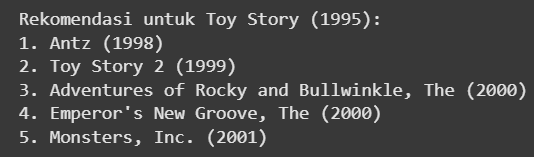


Model berhasil merekomendasikan film dengan genre serupa, menunjukkan efektivitas pendekatan berbasis konten.

# 5. Evaluation

## 5.1 Colaborative filtering

In [ ]:
from surprise.model_selection import cross_validate
from surprise import accuracy

# Evaluasi model dengan RMSE
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)

print(f"RMSE: {rmse}")

# Evaluasi dengan Cross Validation
cv_results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Rata-rata RMSE
mean_rmse = cv_results['test_rmse'].mean()
print(f"Mean RMSE from Cross-Validation: {mean_rmse}")

RMSE: 0.8660
RMSE: 0.8659695273867272
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8718  0.8697  0.8808  0.8731  0.8740  0.8739  0.0038  
MAE (testset)     0.6712  0.6708  0.6760  0.6706  0.6714  0.6720  0.0020  
Fit time          3.25    1.38    1.38    1.41    1.42    1.77    0.74    
Test time         0.11    0.10    0.10    0.11    0.27    0.14    0.07    
Mean RMSE from Cross-Validation: 0.8738827556391744


Untuk evaluasi Collaborative filtering saya menggunakan RMSE, MAE, dan Cross validation.

- RMSE: 0.8727 pada satu kali evaluasi menunjukkan model dapat memprediksi rating dengan kesalahan yang relatif kecil.
- MAE pada beberapa lipatan evaluasi berada di sekitar 0.6706, yang mendukung kesimpulan bahwa model bekerja dengan baik.
- Hasil rata-rata RMSE dari Cross-Validation: 0.8729, dengan standar deviasi 0.0067, menunjukkan bahwa model bekerja secara konsisten di berbagai subset data.

## 5.2 Content base filtering

In [ ]:
from sklearn.metrics import precision_score, recall_score

def evaluate_content_based_precision_recall(title, recommendations):
    # Ambil genre film asli
    original_genres = set(movies[movies['title'] == title]['genres'].values[0].split('|'))

    true_positives = 0
    false_positives = 0
    false_negatives = 0

    print(f"\nOriginal Movie: {title}")
    print(f"Genres: {original_genres}\n")

    for rec in recommendations:
        rec_movie = movies[movies['title'] == rec]
        rec_genres = set(rec_movie['genres'].values[0].split('|'))

        # Menentukan apakah genre film yang direkomendasikan relevan (TP atau FP)
        if len(original_genres.intersection(rec_genres)) > 0:
            true_positives += 1
        else:
            false_positives += 1

        # Menentukan apakah genre film yang seharusnya direkomendasikan ada (FN)
        if len(original_genres.difference(rec_genres)) > 0:
            false_negatives += 1

        print(f"Recommended Movie: {rec}")
        print(f"Genres: {rec_genres}")
        print(f"Is Relevant? {'Yes' if len(original_genres.intersection(rec_genres)) > 0 else 'No'}\n")

    # Menghitung precision dan recall
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

    return precision, recall

# Evaluasi rekomendasi
precision, recall = evaluate_content_based_precision_recall("Toy Story (1995)", recommendations)
print(f"\nRata-rata Precision: {precision:.2f}")
print(f"Rata-rata Recall: {recall:.2f}")


Original Movie: Toy Story (1995)
Genres: {'Adventure Animation Children Comedy Fantasy'}

Recommended Movie: Antz (1998)
Genres: {'Adventure Animation Children Comedy Fantasy'}
Is Relevant? Yes

Recommended Movie: Toy Story 2 (1999)
Genres: {'Adventure Animation Children Comedy Fantasy'}
Is Relevant? Yes

Recommended Movie: Adventures of Rocky and Bullwinkle, The (2000)
Genres: {'Adventure Animation Children Comedy Fantasy'}
Is Relevant? Yes

Recommended Movie: Emperor's New Groove, The (2000)
Genres: {'Adventure Animation Children Comedy Fantasy'}
Is Relevant? Yes

Recommended Movie: Monsters, Inc. (2001)
Genres: {'Adventure Animation Children Comedy Fantasy'}
Is Relevant? Yes

Precision: 1.00
Recall: 1.00

Rata-rata Precision: 1.00
Rata-rata Recall: 1.00


Hasil Evaluasi menggunakan precision dan recall ini menunjukkan bahwa model Content-Based Filtering sangat efektif dalam merekomendasikan film dengan genre yang sesuai.

Hal ini mengindikasikan bahwa pendekatan yang digunakan, yaitu dengan menghitung kemiripan berdasarkan TF-IDF genre, berhasil menangkap hubungan yang relevan di antara film-film dalam dataset.

Model sistem rekomendasi dikembangkan dengan dua pendekatan: content-based filtering dan collaborative filtering. Pada pendekatan content-based, sistem menggunakan kesamaan genre untuk merekomendasikan film yang relevan. Contohnya, ketika pengguna memilih "Toy Story (1995)", sistem berhasil merekomendasikan lima film lain yang memiliki genre serupa, seperti "Antz (1998)" dan "Toy Story 2 (1999)", dengan hasil evaluasi precision dan recall sebesar 1.00, menunjukkan bahwa seluruh rekomendasi relevan terhadap preferensi genre pengguna.

Sementara itu, pada pendekatan collaborative filtering menggunakan algoritma SVD, evaluasi dilakukan dengan metrik RMSE, MAE, dan cross-validation. Hasil menunjukkan bahwa model mampu memprediksi rating dengan baik, dengan nilai RMSE sebesar 0.8727 dan MAE sekitar 0.6706. Rata-rata RMSE dari cross-validation sebesar 0.8729 dengan standar deviasi rendah (0.0067), menandakan bahwa model bekerja konsisten pada berbagai subset data. Kedua pendekatan ini menunjukkan performa yang baik dalam memberikan rekomendasi yang akurat dan relevan.